**Algorithme de division multivariée**

In [2]:
#Division multivariée
def div_mult(f, L):
    g = f
    Q = [0 for i in range(len(L))]
    R = 0
    while g != 0:
        b = True
        i = 0
        glm = g.lt()
        while b and i < len(L):
            Lilm = L[i].lt()
            if glm % Lilm == 0:
                g -= L[i]*(glm // Lilm)
                Q[i] += glm // Lilm
                b = False
            i += 1
        if b:
            g -= glm
            R += glm
    return Q, R

In [3]:
_.<x1,x2> = PolynomialRing(QQ, 2, order = 'lex')
f = x1^2 + x1*x2 + x2^2
L = [x1, x1 + x2]
print(div_mult(f, L))

([x1 + x2, 0], x2^2)


In [6]:
_.<x,y> = QQ[]
f = 2*x^3 - y^2 - 4*x*y - 2*x^2* y + x - x*y^2 + 4
g1 = 2*x^2 + y
g2 = x*y + 1
_, R = div_mult(f, [g1, g2])
print(R)

x + y + 9


**Algorithme de Buchberger**

In [7]:
#siziji (?)
def sfg(f, g):
    A = f.parent()
    inter = lcm(f.lm(), g.lm())
    return A(f*inter/f.lt() - g*inter/g.lt())

#Critère de Buchberger
def is_grob(L):
    b = True
    for i in range(len(L)):
        for j in range(i):
            _,R = div_mult(sfg(L[i], L[j]), L)
            b = b & (R == 0)
    return b

#Algorithme de Buchberger
def grobner_basis(L):
    b = True
    while b:
        b = False
        G = copy(L)
        for f in G:
            for g in G:
                _, r = div_mult(sfg(f, g), G)
                if r != 0:
                    L.append(r)
                    b = True
        L = list(set(L))
    return L

In [8]:
G = grobner_basis(L)
_,r = div_mult(f,G)
print("f est dans I : " + str(r == 0))

f est dans I : True


**Affichage d'un éventail de Groebner 2d**

In [25]:
def gf_render_2d(gf):
    rayons = gf.polyhedralfan().rays()
    show(sum(line([(0, 0), (r[0], r[1])]) for r in rayons))

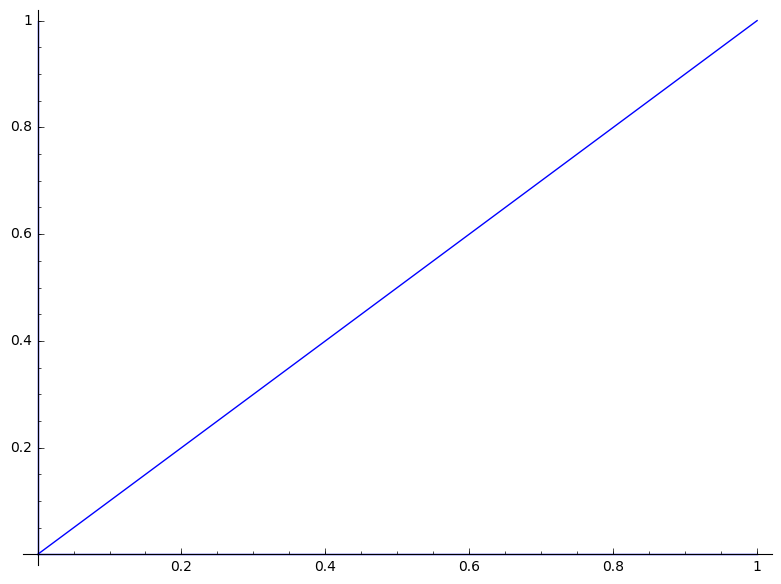

In [26]:
A.<x,y> = PolynomialRing(QQ, order = 'lex')
I = A.ideal(x^2 + y^2 - 1, x + 2*y)
gf = I.groebner_fan()
gf_render_2d(gf)